# IMDB Sentiment Classification with Tree-Based Models
This notebook performs sentiment classification on the IMDB movie reviews dataset using Decision Tree and Random Forest classifiers. The text data is preprocessed, vectorized with TF-IDF, and evaluated with accuracy and confusion matrices.

## 1. Data Loading and Preprocessing

In [1]:
# Download the IMDB dataset
!gdown 1nxR07ebVNc5bSgfTQjeUcAoyoaNuuH6s

Downloading...
From: https://drive.google.com/uc?id=1nxR07ebVNc5bSgfTQjeUcAoyoaNuuH6s
To: c:\Users\admin\Downloads\IMDB-Dataset.csv

  0%|          | 0.00/66.2M [00:00<?, ?B/s]
  1%|          | 524k/66.2M [00:00<00:44, 1.47MB/s]
  2%|▏         | 1.57M/66.2M [00:00<00:17, 3.68MB/s]
  3%|▎         | 2.10M/66.2M [00:00<00:15, 4.10MB/s]
  6%|▌         | 3.67M/66.2M [00:00<00:09, 6.90MB/s]
  7%|▋         | 4.72M/66.2M [00:00<00:08, 7.58MB/s]
  9%|▊         | 5.77M/66.2M [00:00<00:07, 7.92MB/s]
 10%|█         | 6.82M/66.2M [00:01<00:08, 7.26MB/s]
 13%|█▎        | 8.39M/66.2M [00:01<00:06, 9.25MB/s]
 14%|█▍        | 9.44M/66.2M [00:01<00:06, 9.38MB/s]
 16%|█▌        | 10.5M/66.2M [00:01<00:05, 9.31MB/s]
 17%|█▋        | 11.5M/66.2M [00:01<00:06, 8.97MB/s]
 19%|█▉        | 12.6M/66.2M [00:01<00:05, 9.13MB/s]
 21%|██        | 13.6M/66.2M [00:01<00:05, 9.22MB/s]
 22%|██▏       | 14.7M/66.2M [00:01<00:05, 8.88MB/s]
 24%|██▍       | 15.7M/66.2M [00:02<00:05, 9.16MB/s]
 26%|██▌       | 17.3M/66.2M 

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('IMDB-Dataset.csv')
df = df.drop_duplicates()
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [3]:
import re
import string
import nltk
import contractions
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize stopwords and lemmatizer
stop = set(stopwords.words('english'))
wl = WordNetLemmatizer()

def preprocess_text(text):
    # Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()

    # Expand contractions (e.g., "can't" → "cannot")
    text = contractions.fix(text)

    # Remove emojis using regex unicode ranges
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags
        u"\U00002702-\U000027B0"  # miscellaneous symbols
        u"\U000024C2-\U0001F251"  # enclosed characters
        "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Lemmatize, remove stopwords, and keep only alphabetic words
    words = [
        wl.lemmatize(word)
        for word in text.split()
        if word.isalpha() and word not in stop
    ]

    return ' '.join(words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
# Apply preprocessing to the review column
df['review'] = df['review'].apply(preprocess_text)
df

C:\Users\admin\AppData\Local\Temp\ipykernel_13108\1951205101.py:19: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()


,review,sentiment
0,one reviewer mentioned watching oz episode hoo...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically family little boy jake think zombie ...,negative
4,petter matteis love time money visually stunni...,positive
...,...,...
49995,thought movie right good job creative original...,positive
49996,bad plot bad dialogue bad acting idiotic direc...,negative
49997,catholic taught parochial elementary school nu...,negative
49998,going disagree previous comment side maltin on...,negative


## 2. Data Exploration

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of positive and negative sentiments
pos_count = (df['sentiment'] == 'positive').sum()
neg_count = (df['sentiment'] == 'negative').sum()

# Data and labels for the pie chart
data = [pos_count, neg_count]
labels = ['Positive', 'Negative']
colors = [sns.color_palette()[0], 'tab:red']  # blue and red

# Function to format percentage and actual count on the chart
def format_label(pct):
    total = sum(data)
    count = int(pct / 100 * total)
    return f"{pct:.1f}%\n({count})"

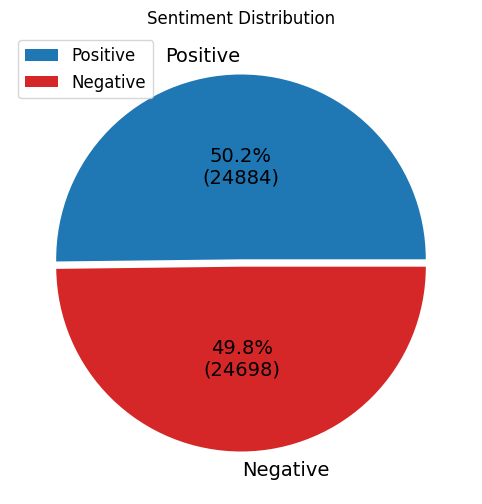

In [6]:
# Create and display the pie chart
plt.figure(figsize=(8, 6))
plt.pie(data, labels=labels, autopct=format_label, explode=[0.02]*2,
        colors=colors, pctdistance=0.5, textprops={'fontsize': 14})
plt.title('Sentiment Distribution')
plt.legend(loc='best', fontsize=12)
plt.show()

In [7]:
# Create a temporary DataFrame to avoid modifying the original
df_temp = df.copy()

# Calculate the number of words in each review
df_temp['words_length'] = df_temp['review'].str.split().map(len)

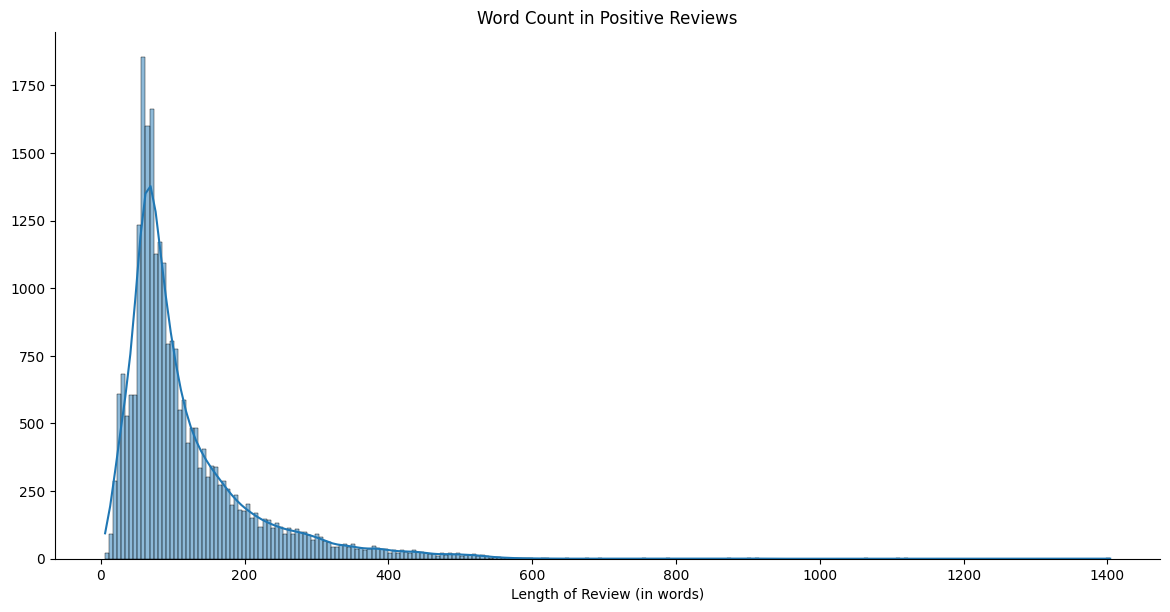

In [8]:
# Plot word count distribution for positive reviews
sns.displot(data=df_temp[df_temp['sentiment'] == 'positive'], x='words_length', kde=True, height=6, aspect=2)
plt.xlabel('Length of Review (in words)')
plt.ylabel('')
plt.title('Word Count in Positive Reviews')
plt.show()

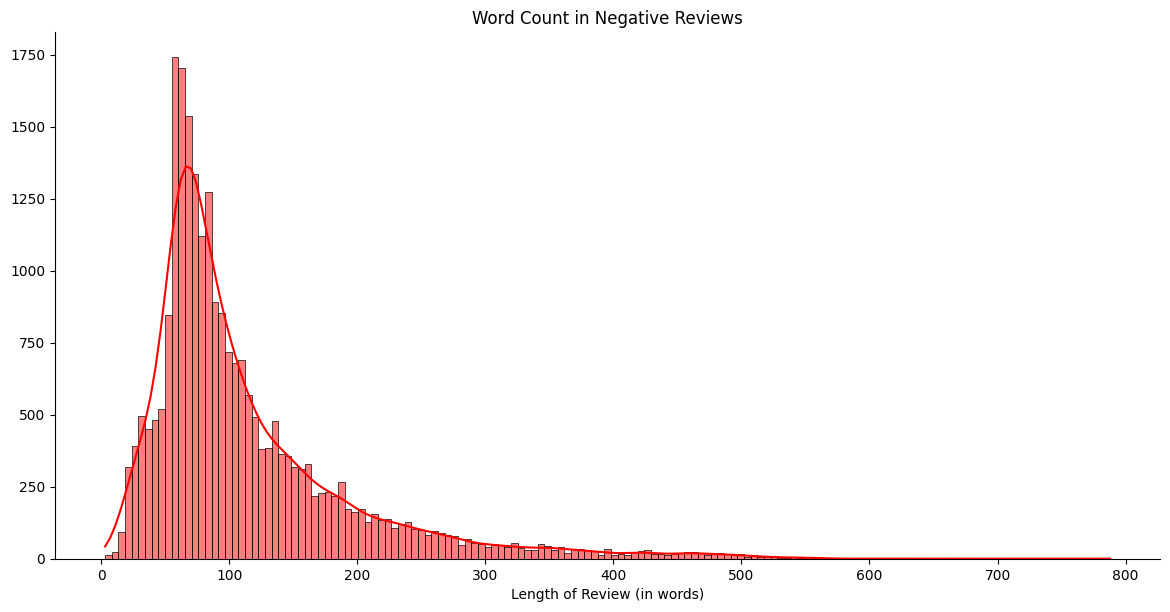

In [9]:
# Plot word count distribution for negative reviews
sns.displot(data=df_temp[df_temp['sentiment'] == 'negative'], x='words_length', kde=True, height=6, aspect=2, color='red')
plt.xlabel('Length of Review (in words)')
plt.ylabel('')
plt.title('Word Count in Negative Reviews')
plt.show()

## 3. Train/Test Split & Vectorization

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Encode the sentiment labels
label_encoder = LabelEncoder()
y_data = label_encoder.fit_transform(df['sentiment'])
x_data = df['review']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
tfidf = TfidfVectorizer(max_features=10000)
x_train_encoded = tfidf.fit_transform(x_train)
x_test_encoded = tfidf.transform(x_test)

# Length of the training and testing sets
print(f"Training set length: {x_train_encoded.shape[0]}")
print(f"Testing set length: {x_test_encoded.shape[0]}")

Training set length: 39665
Testing set length: 9917


## 4. Models Training

### 4.1. Decision Tree

In [11]:
from sklearn.tree import DecisionTreeClassifier

# Train a Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_model.fit(x_train_encoded, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

### 4.2. Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train_encoded, y_train)

RandomForestClassifier(random_state=42)

## 5. Evaluation & Comparison

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Predict on the test set
y_pred_dt = dt_model.predict(x_test_encoded)
y_pred_rf = rf_model.predict(x_test_encoded)

# Calculate accuracy for both models
acc_dt = accuracy_score(y_test, y_pred_dt)
acc_rf = accuracy_score(y_test, y_pred_rf)

# Print the accuracy results
print(f"Decision Tree Accuracy: {acc_dt:.2%}")
print(f"Random Forest Accuracy: {acc_rf:.2%}")

Decision Tree Accuracy: 71.29%
Random Forest Accuracy: 83.89%


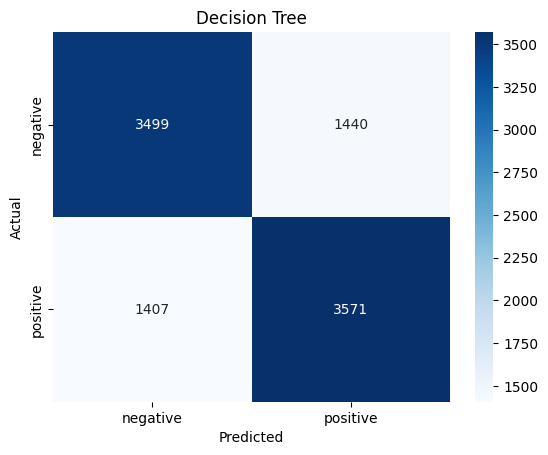

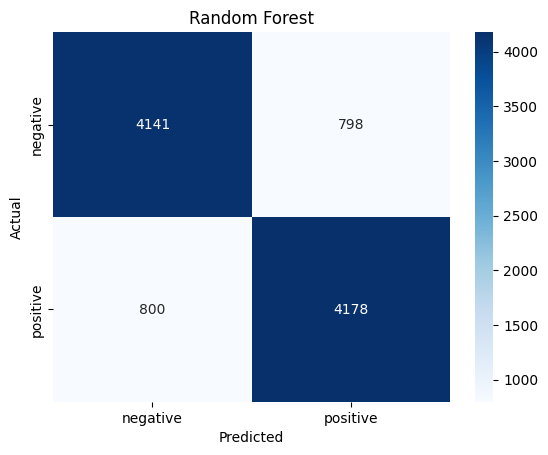

In [14]:
# Plot confusion matrices for both models
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_conf_matrix(y_test, y_pred_dt, "Decision Tree")
plot_conf_matrix(y_test, y_pred_rf, "Random Forest")

## 6. Extended Model Evaluation and Comparison

### 6.1. Training and Evaluating Optimized Models

In [15]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Define classifiers with tuned hyperparameters
models = {
    "Decision Tree": DecisionTreeClassifier(
        criterion='entropy',
        max_depth=20,
        min_samples_split=10,
        min_samples_leaf=5,
        random_state=42
    ),
    "Random Forest": RandomForestClassifier(
        n_estimators=200,
        max_depth=25,
        min_samples_split=10,
        min_samples_leaf=5,
        bootstrap=True,
        random_state=42
    ),
    "AdaBoost": AdaBoostClassifier(
        n_estimators=100,
        learning_rate=0.8,
        random_state=42
    ),
    "Gradient Boosting": GradientBoostingClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        random_state=42
    ),
    "XGBoost": XGBClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=4,
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    )
}

In [16]:
from tqdm import tqdm
import time

results = []

# Train and evaluate each model
for name in tqdm(models, desc="Training models"):
    model = models[name]
    start = time.time()
    model.fit(x_train_encoded, y_train)
    y_pred = model.predict(x_test_encoded)
    end = time.time()
    acc = accuracy_score(y_test, y_pred)
    results.append((name, acc, end - start))
    print(f"{name}: Accuracy = {acc:.4f}, Time = {end - start:.2f}s")


Training models:  20%|██        | 1/5 [00:16<01:04, 16.06s/it]

Decision Tree: Accuracy = 0.7256, Time = 16.06s


Training models:  40%|████      | 2/5 [00:44<01:09, 23.29s/it]

Random Forest: Accuracy = 0.8328, Time = 28.35s


Training models:  60%|██████    | 3/5 [01:37<01:13, 36.95s/it]

AdaBoost: Accuracy = 0.7477, Time = 53.20s


Training models:  80%|████████  | 4/5 [03:18<01:02, 62.34s/it]

Gradient Boosting: Accuracy = 0.7940, Time = 101.27s


c:\Users\admin\anaconda3\envs\Phatban\lib\site-packages\xgboost\training.py:183: UserWarning: [11:42:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
Training models: 100%|██████████| 5/5 [03:37<00:00, 43.52s/it]

XGBoost: Accuracy = 0.8008, Time = 18.70s


### 6.2. Performance Comparison

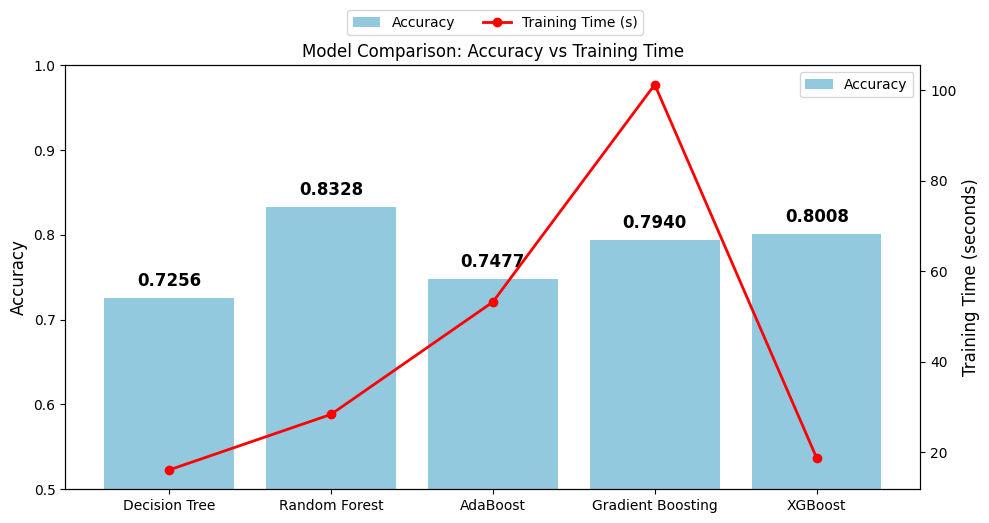

In [20]:
fig, ax1 = plt.subplots(figsize=(10, 5))

# Prepare data for plotting
model_names, accuracies, times = zip(*results)

# Bar: Accuracy
sns.barplot(x=model_names, y=accuracies, ax=ax1, color='skyblue', label='Accuracy')
for i, acc in enumerate(accuracies):
    ax1.text(i, acc + 0.01, f"{acc:.4f}", ha='center', va='bottom', fontsize=12, fontweight='bold')
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.set_ylim(0.5, 1.0)

# Line: Training Time
ax2 = ax1.twinx()
ax2.plot(model_names, times, color='red', marker='o', linewidth=2, label='Training Time (s)')
ax2.set_ylabel('Training Time (seconds)', fontsize=12)

# Combined legend
lines_labels = [ax.get_legend_handles_labels() for ax in [ax1, ax2]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, loc="upper center", ncol=2, bbox_to_anchor=(0.5, 1.05))

ax1.set_title("Model Comparison: Accuracy vs Training Time")
plt.tight_layout()
plt.show()
